# Simulating a magnet using a Monte Carlo algorithm



In [1]:
import numpy as np
import matplotlib.pyplot as plt 
##base on explanation of Dr.Börge Göbel

We know The length of each moment is fixed \\( |\vec{m}_i| = 1 \\) but the orientation is chosen randomly. We can construct this by generating a random polar angle \\( \varphi_i \\) and azimutal angle \\( \theta_i \\) and using spherical coordinates:

\\( \vec{m}_i = \begin{pmatrix} \cos\varphi_i\sin\theta_i \\ \sin\varphi_i\sin\theta_i \\ \cos\theta_i \end{pmatrix} \\)

### Magnetic moments

In [2]:
length = 30
num = length**2

randphi = 2*np.pi * np.random.rand(num).reshape (length, length, 1)    #it is like a 40×40 grid, each cell holding one value
randtheta = np.pi * np.random.rand(num).reshape (length, length, 1)


In [3]:
randtheta[0,2,0]

0.029199042190724625

In [4]:
mag = np.array([ np.cos(randphi)*np.sin(randtheta), np.sin(randphi)*np.sin(randtheta), np.cos(randtheta) ])

In [5]:
mag.shape

(3, 30, 30, 1)

In [6]:
mag[:,9,2,0]    #: → all 3 components (x, y, z) so:  39 → 40th row , 2 → 3rd column, 0 → first (and only) depth

array([-0.12869253,  0.01353994,  0.9915921 ])

In [7]:
# Check norm
l=np.sqrt( mag[0,:]**2 + mag[1,:]**2 + mag[2,:]**2 )    #or special point :np.sqrt( mag[0,:]**2 + mag[1,:]**2 + mag[2,:]**2 [5,2,0]
l.shape


(30, 30, 1)

### Positions

In [8]:
coords = np.array(np.meshgrid(np.arange(length),
                              np.arange(length),
                              np.arange(1)))

#plt.rcParams['figure.figsize'] = [40, 15]
#arrowplot = plt.axes(projection='3d')
#arrowplot.axis(False)
#arrowplot.scatter3D(coords[0],coords[1],coords[2])
#np.meshgrid(...) → returns a list of coordinate array
coords.shape        #That means coords[0] gives the x-coordinates,coords[1] gives the y-coordinates,coords[2] gives the z-coordinate

(3, 30, 30, 1)

### Plot

In [9]:
# Change standard size of all figures in this notebook
plt.rcParams['figure.figsize'] = [40, 15]

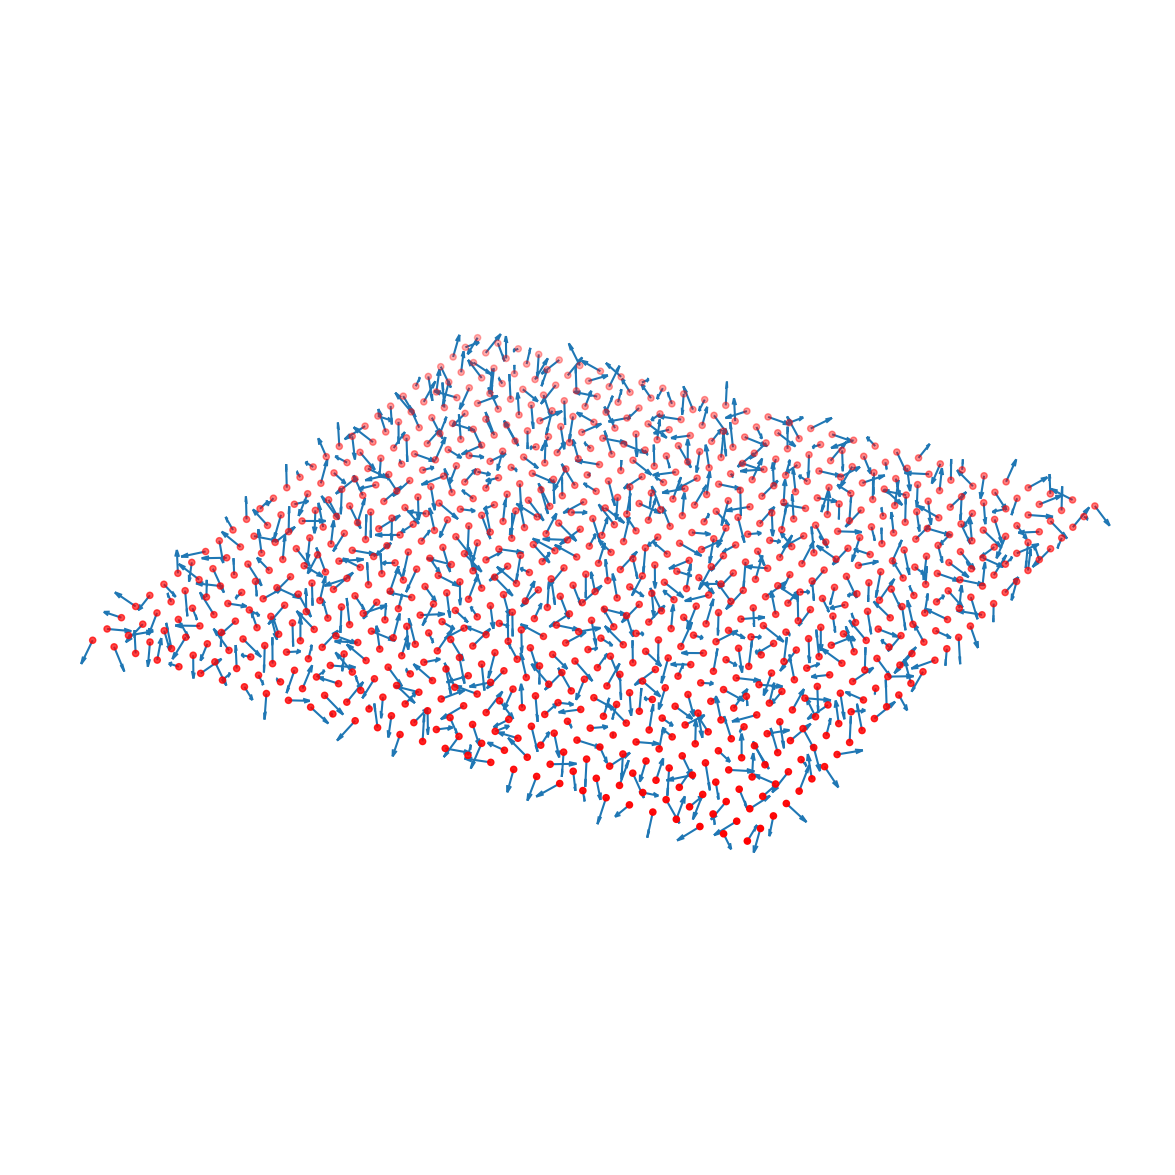

In [10]:
arrowplot = plt.axes(projection='3d') #makes a 3D axes- plot
arrowplot.set_zlim(-1,1)
arrowplot.set_box_aspect(aspect = (length, length, 2))   #Keeping proportions correct
 
# make background invisible
arrowplot.axis(False)       #to hide background & axes

# Quiver plot (arrows)
arrowplot.quiver(
    coords[0],coords[1],coords[2],
    mag[0],mag[1],mag[2]
    )

# Coordinate plot
arrowplot.scatter3D(coords[0],coords[1],coords[2], color='red')

## 2. Calculating the energy 


\\( H = -\frac{1}{2}J\sum_{<i,j>}\vec{m}_i\cdot\vec{m}_j  \\) 



In [11]:
J = 1

In [12]:
def energyExchangeContribution(mag,x,y):
    return -0.5 * J * np.dot( mag[:,x,y,0], mag[:,(x+1)%length,y,0]+mag[:,(x-1)%length,y,0]+mag[:,x,(y+1)%length,0]+mag[:,x,(y-1)%length,0])

def energyExchange(mag):
    # mag: Array magnetic moments
    energy = 0
    for x in range(length):
        for y in range(length):
            energy = energy + energyExchangeContribution(mag,x,y)
    return energy

In [13]:
energyExchange(mag)

-10.351114816401063

In [14]:
def stepExchange(mag):
    # 1.
    x = np.random.randint(length)
    y = np.random.randint(length)
    energyold = 2 * energyExchangeContribution(mag,x,y)
    # 2.
    randphi = 2*np.pi * np.random.rand()
    randtheta = np.pi * np.random.rand()
    # Problem with the ids: savemag = mag[:,x,y,0] ==> savemag will be changed once mag[:,x,y,0] is changed in the next line
    savemag = np.array(mag[:,x,y,0]) #we can also use :savemag = mag[:, x, y, 0].copy()
    mag[:,x,y,0] = np.array([ np.cos(randphi)*np.sin(randtheta), np.sin(randphi)*np.sin(randtheta), np.cos(randtheta) ])
    # 3. 
    energynew = 2 * energyExchangeContribution(mag,x,y)
    # 4.
    if ( energynew < energyold):
        # accept the change & update the energy
        energychange = energynew - energyold
    else:
        # decline & restore old moment
        mag[:,x,y,0] = savemag
        energychange = 0
    return [mag, energychange]

In [15]:
stepExchange(mag)[1]

-0.80360448990941

In [16]:
numberSteps = 5000000

#optional
# energy = energyExchange(mag)
energy = energyExchange(mag) 
energyList = [energy]

for i in range(numberSteps):
    mag, energychange = stepExchange(mag)          # Initial version: zero temperature
    #optional
    energy = energy + energychange
    energyList.append(energy)

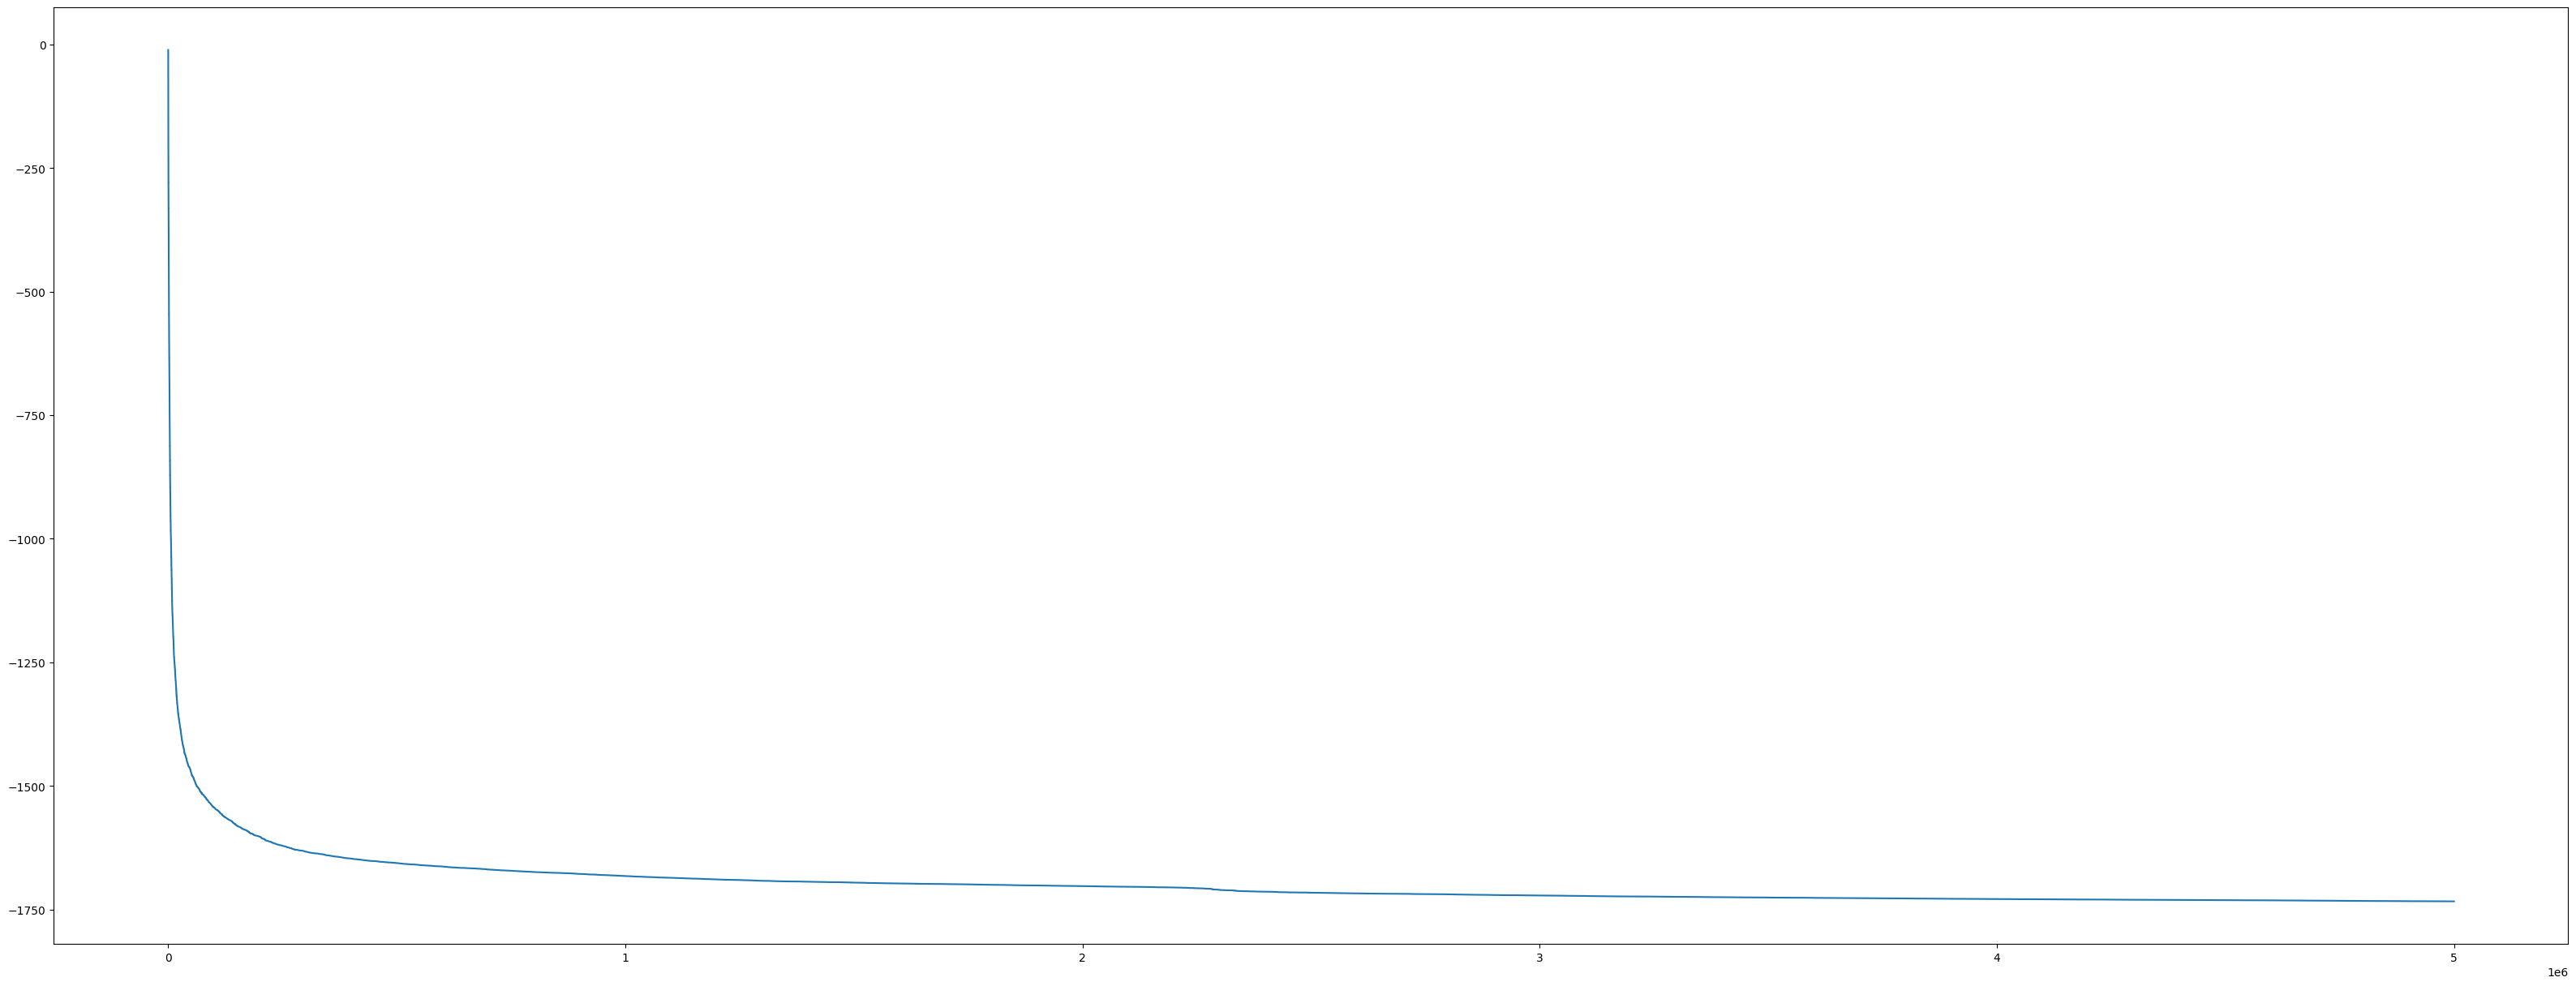

In [17]:
plt.plot(range(numberSteps+1), energyList)

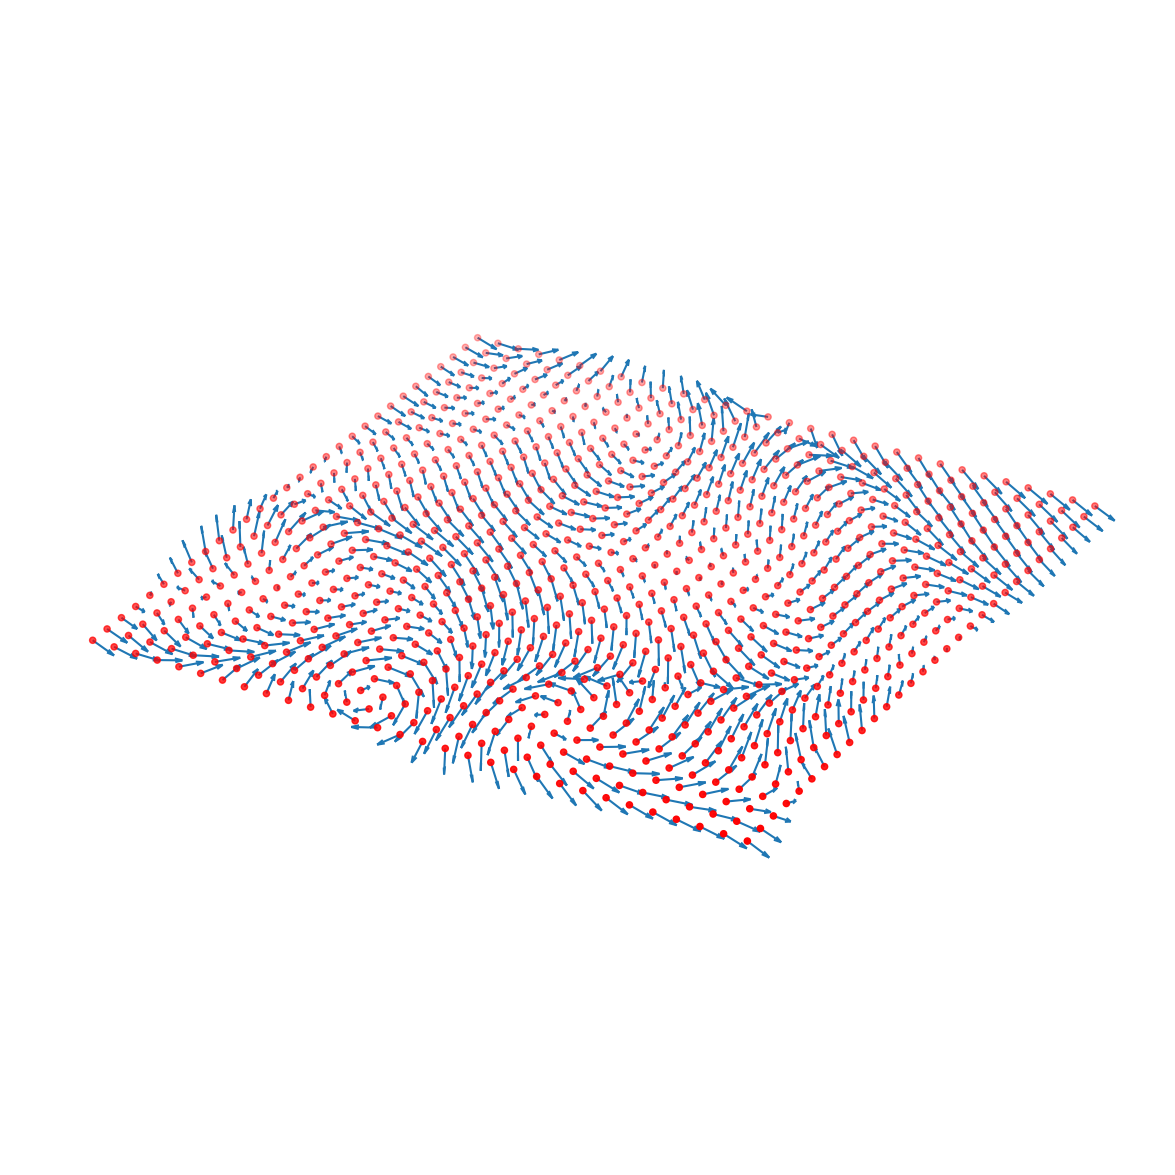

In [18]:
arrowplot = plt.axes(projection='3d')
arrowplot.set_zlim(-1,1)
arrowplot.set_box_aspect(aspect = (length, length, 2))

# make background invisible
arrowplot.axis(False)

# Quiver plot
arrowplot.quiver(
    coords[0],coords[1],coords[2],
    mag[0],mag[1],mag[2]
    )

# Coordinate plot
arrowplot.scatter3D(coords[0],coords[1],coords[2], color='red')

In [19]:
energyList[-1]

-1733.4877908480614

In [20]:
energyExchange(mag) 

-1733.4877908480673

In [21]:
length = 30
num = length**2

randphi = 2*np.pi * np.random.rand(num).reshape (length, length, 1)    #it is like a 40×40 grid, each cell holding one value
randtheta = np.pi * np.random.rand(num).reshape (length, length, 1)

In [22]:
mag = np.array([ np.cos(randphi)*np.sin(randtheta), np.sin(randphi)*np.sin(randtheta), np.cos(randtheta) ])

In [23]:
def stepExchangeT(mag, kBtemp):
    # 1.
    x = np.random.randint(length)
    y = np.random.randint(length)
    energyold = 2 * energyExchangeContribution(mag,x,y)
    # 2.
    randphi = 2*np.pi * np.random.rand()
    randtheta = np.pi * np.random.rand()
    # Problem with the ids: savemag = mag[:,x,y,0] ==> savemag will be changed once mag[:,x,y,0] is changed in the next line
    savemag = np.array(mag[:,x,y,0])
    mag[:,x,y,0] = np.array([ np.cos(randphi)*np.sin(randtheta), np.sin(randphi)*np.sin(randtheta), np.cos(randtheta) ])
    # 3. 
    energynew = 2 * energyExchangeContribution(mag,x,y)
    # 4.
    if ( energynew < energyold):
        # accept the change & update the energy
        energychange = energynew - energyold
    else:
        if np.random.rand() < np.exp( -(energynew - energyold) / kBtemp ):   #P_accept​=min(1,e−ΔE/(kB​T))
            # accept the change & update the energy
            energychange = energynew - energyold
        else:
            # decline & restore old moment
            mag[:,x,y,0] = savemag
            energychange = 0
    return [mag, energychange]

In [24]:
numberSteps = 5000000

#optional
# energy = energyExchange(mag)
energy = energyExchange(mag) 
energyList = [energy]

for i in range(numberSteps):
    # mag, energychange = stepExchange(mag)          # Initial version: zero temperature
    kBtemp = 0.2*(1-i/numberSteps)
    # mag, energychange = stepExchangeT(mag,kBtemp)  # Update 1: Consider finite temperatures
    mag, energychange = stepExchangeT(mag,kBtemp)            # Update 2&3: Add interaction with magnetic field & DMI
    #optional
    energy = energy + energychange
    energyList.append(energy)

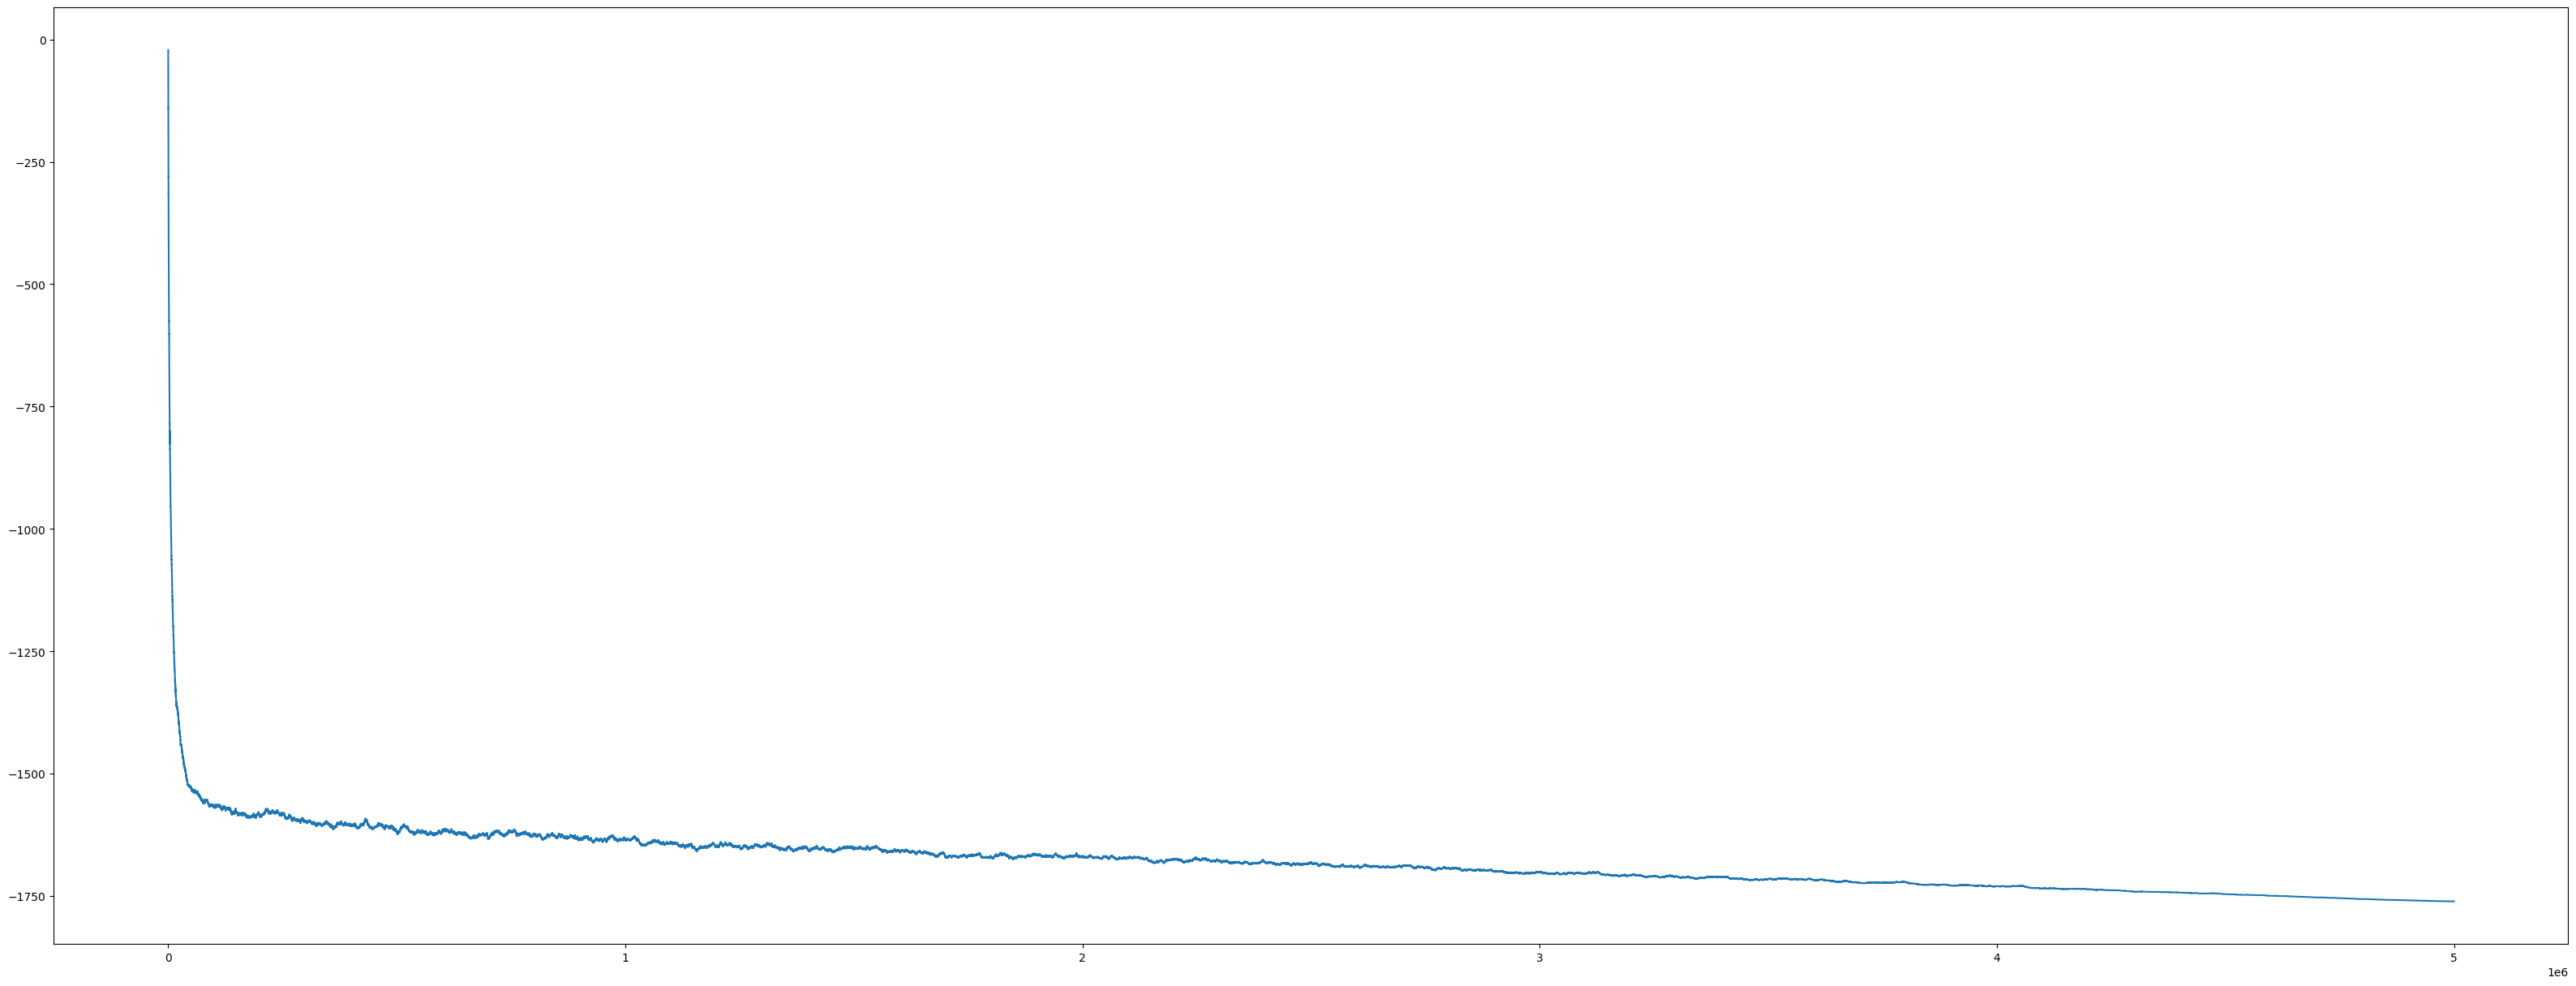

In [25]:
plt.plot(range(numberSteps+1), energyList)

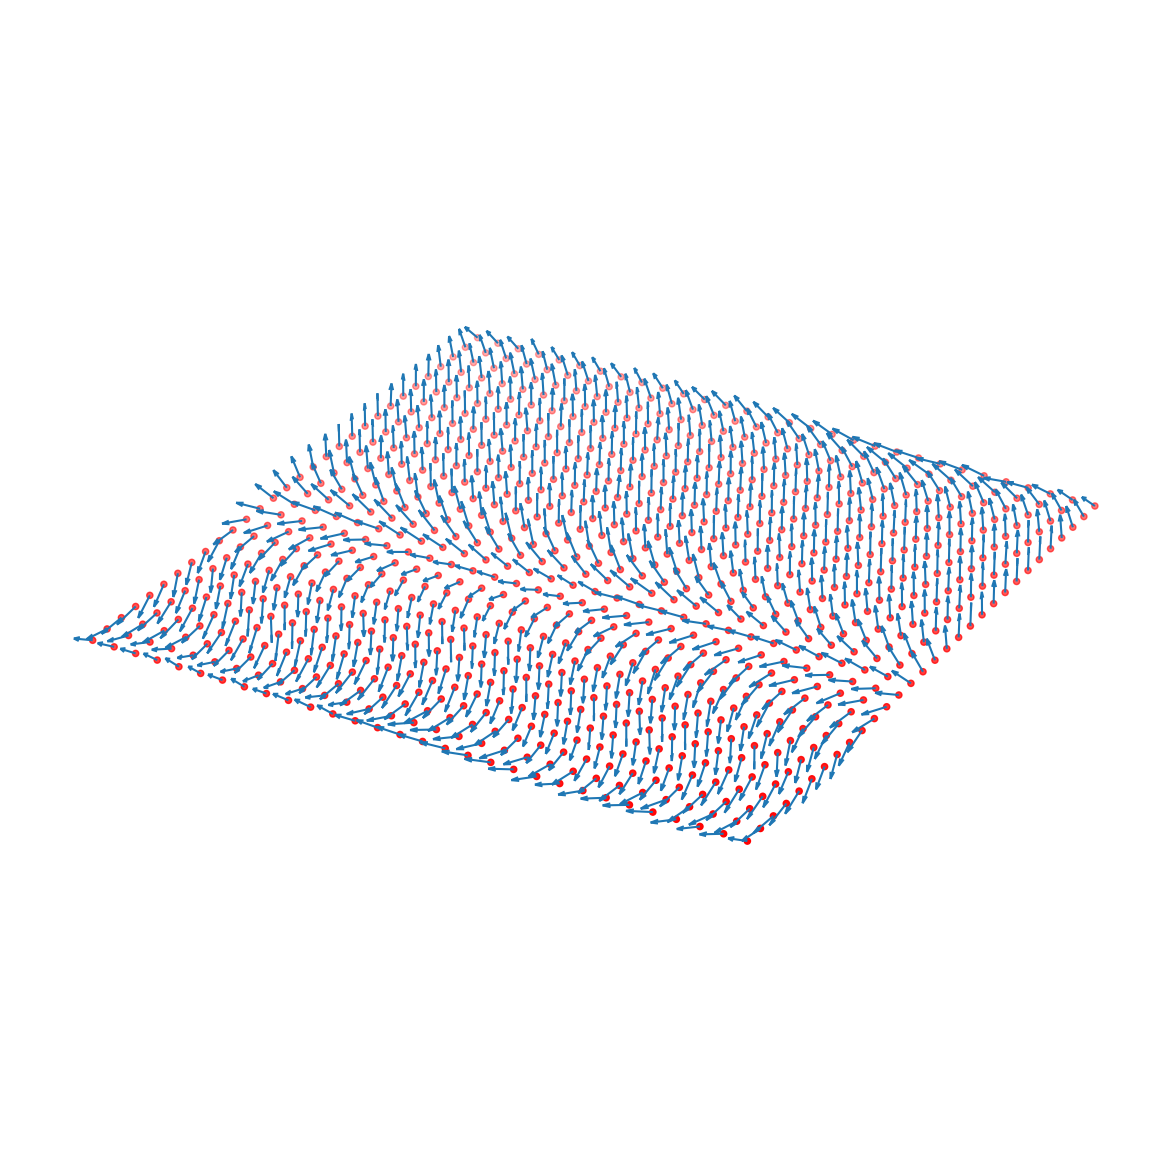

In [26]:
arrowplot = plt.axes(projection='3d')
arrowplot.set_zlim(-1,1)
arrowplot.set_box_aspect(aspect = (length, length, 2))

# make background invisible
arrowplot.axis(False)

# Quiver plot
arrowplot.quiver(
    coords[0],coords[1],coords[2],
    mag[0],mag[1],mag[2]
    )

# Coordinate plot
arrowplot.scatter3D(coords[0],coords[1],coords[2], color='red')

In [27]:
energyList[-1]

-1760.9574892186592

__Update 2:__ We can apply an external magnetic field \\( \vec{B} \\). This leads to the energy:

\\( H = -\frac{1}{2}J\sum_{<i,j>}\vec{m}_i\cdot\vec{m}_j - \mu \sum_i \vec{B}\cdot \vec{m}_i \\) 

In [28]:
mu = 1
B = np.array([0, 0, 0])

def energyMagneticContribution(mag,x,y):
    return - mu * np.dot(B, mag[:,x,y,0])

def energyMagnetic(mag):
    # mag: Array magnetic moments
    energy = 0
    for x in range(length):
        for y in range(length):
            energy = energy + energyMagneticContribution(mag,x,y)
    return energy

__Update 3:__ We include the Dzyaloshinskii–Moriya interaction (asymmetric exchange).

\\( H = -\frac{1}{2}J\sum_{<i,j>}\vec{m}_i\cdot\vec{m}_j - \mu B \sum_i m_i^{(z)}  + \frac{1}{2}\sum_{<i,j>}\vec{D}_{ij}\cdot\left(\vec{m}_i\times\vec{m}_j\right)\\) 

The vectors \\( \vec{D}_{ij} \\) are determined by the symmetry of the sample. In our example, they shall point along the direction \\( i \rightarrow j\\). 

As an example, let us consider a bond along the \\( x \\) direction:

\\( \vec{D}_{ij}\cdot\left(\vec{m}_i\times\vec{m}_j\right) = D \vec{e}_x \cdot \left(\vec{m}_i\times\vec{m}_j\right) = D \left( m_i^{(y)}m_j^{(z)} - m_i^{(z)}m_j^{(y)} \right)\\) 

For a bond along the \\( y \\) direction:

\\( \vec{D}_{ij}\cdot\left(\vec{m}_i\times\vec{m}_j\right) = D \vec{e}_y \cdot \left(\vec{m}_i\times\vec{m}_j\right) = D \left( m_i^{(z)}m_j^{(x)} - m_i^{(x)}m_j^{(z)} \right)\\) 

In [29]:
D = 0.3

def energyDMIContribution(mag,x,y):
    right = mag[1,x,y,0]*mag[2,(x+1)%length,y,0] - mag[2,x,y,0]*mag[1,(x+1)%length,y,0]
    left = -mag[1,x,y,0]*mag[2,(x-1)%length,y,0] + mag[2,x,y,0]*mag[1,(x-1)%length,y,0]
    up = mag[2,x,y,0]*mag[0,x,(y+1)%length,0] - mag[0,x,y,0]*mag[2,x,(y+1)%length,0]
    down = -mag[2,x,y,0]*mag[0,x,(y-1)%length,0] + mag[0,x,y,0]*mag[2,x,(y-1)%length,0]
    return 0.5 * D * (right + left + up + down)

def energyDMI(mag):
    # mag: Array magnetic moments
    energy = 0
    for x in range(length):
        for y in range(length):
            energy = energy + energyDMIContribution(mag,x,y)
    return energy

## 3. Metropolis step

In [30]:
def stepExchangeT(mag, kBtemp):
    # 1.
    x = np.random.randint(length)
    y = np.random.randint(length)
    energyold = 2 * energyExchangeContribution(mag,x,y)
    # 2.
    randphi = 2*np.pi * np.random.rand()
    randtheta = np.pi * np.random.rand()
    # Problem with the ids: savemag = mag[:,x,y,0] ==> savemag will be changed once mag[:,x,y,0] is changed in the next line
    savemag = np.array(mag[:,x,y,0])
    mag[:,x,y,0] = np.array([ np.cos(randphi)*np.sin(randtheta), np.sin(randphi)*np.sin(randtheta), np.cos(randtheta) ])
    # 3. 
    energynew = 2 * energyExchangeContribution(mag,x,y)
    # 4.
    if ( energynew < energyold):
        # accept the change & update the energy
        energychange = energynew - energyold
    else:
        if np.random.rand() < np.exp( -(energynew - energyold) / kBtemp ):   #P_accept​=min(1,e−ΔE/(kB​T))
            # accept the change & update the energy
            energychange = energynew - energyold
        else:
            # decline & restore old moment
            mag[:,x,y,0] = savemag
            energychange = 0
    return [mag, energychange]

In [31]:
numberSteps = 1000000

#optional
# energy = energyExchange(mag)
energy = energyExchange(mag) 
energyList = [energy]

for i in range(numberSteps):
    # mag, energychange = stepExchange(mag)          # Initial version: zero temperature
    kBtemp = 0.2*(1-i/numberSteps)
    # mag, energychange = stepExchangeT(mag,kBtemp)  # Update 1: Consider finite temperatures
    mag, energychange = stepExchangeT(mag,kBtemp)            # Update 2&3: Add interaction with magnetic field & DMI
    #optional
    energy = energy + energychange
    energyList.append(energy)

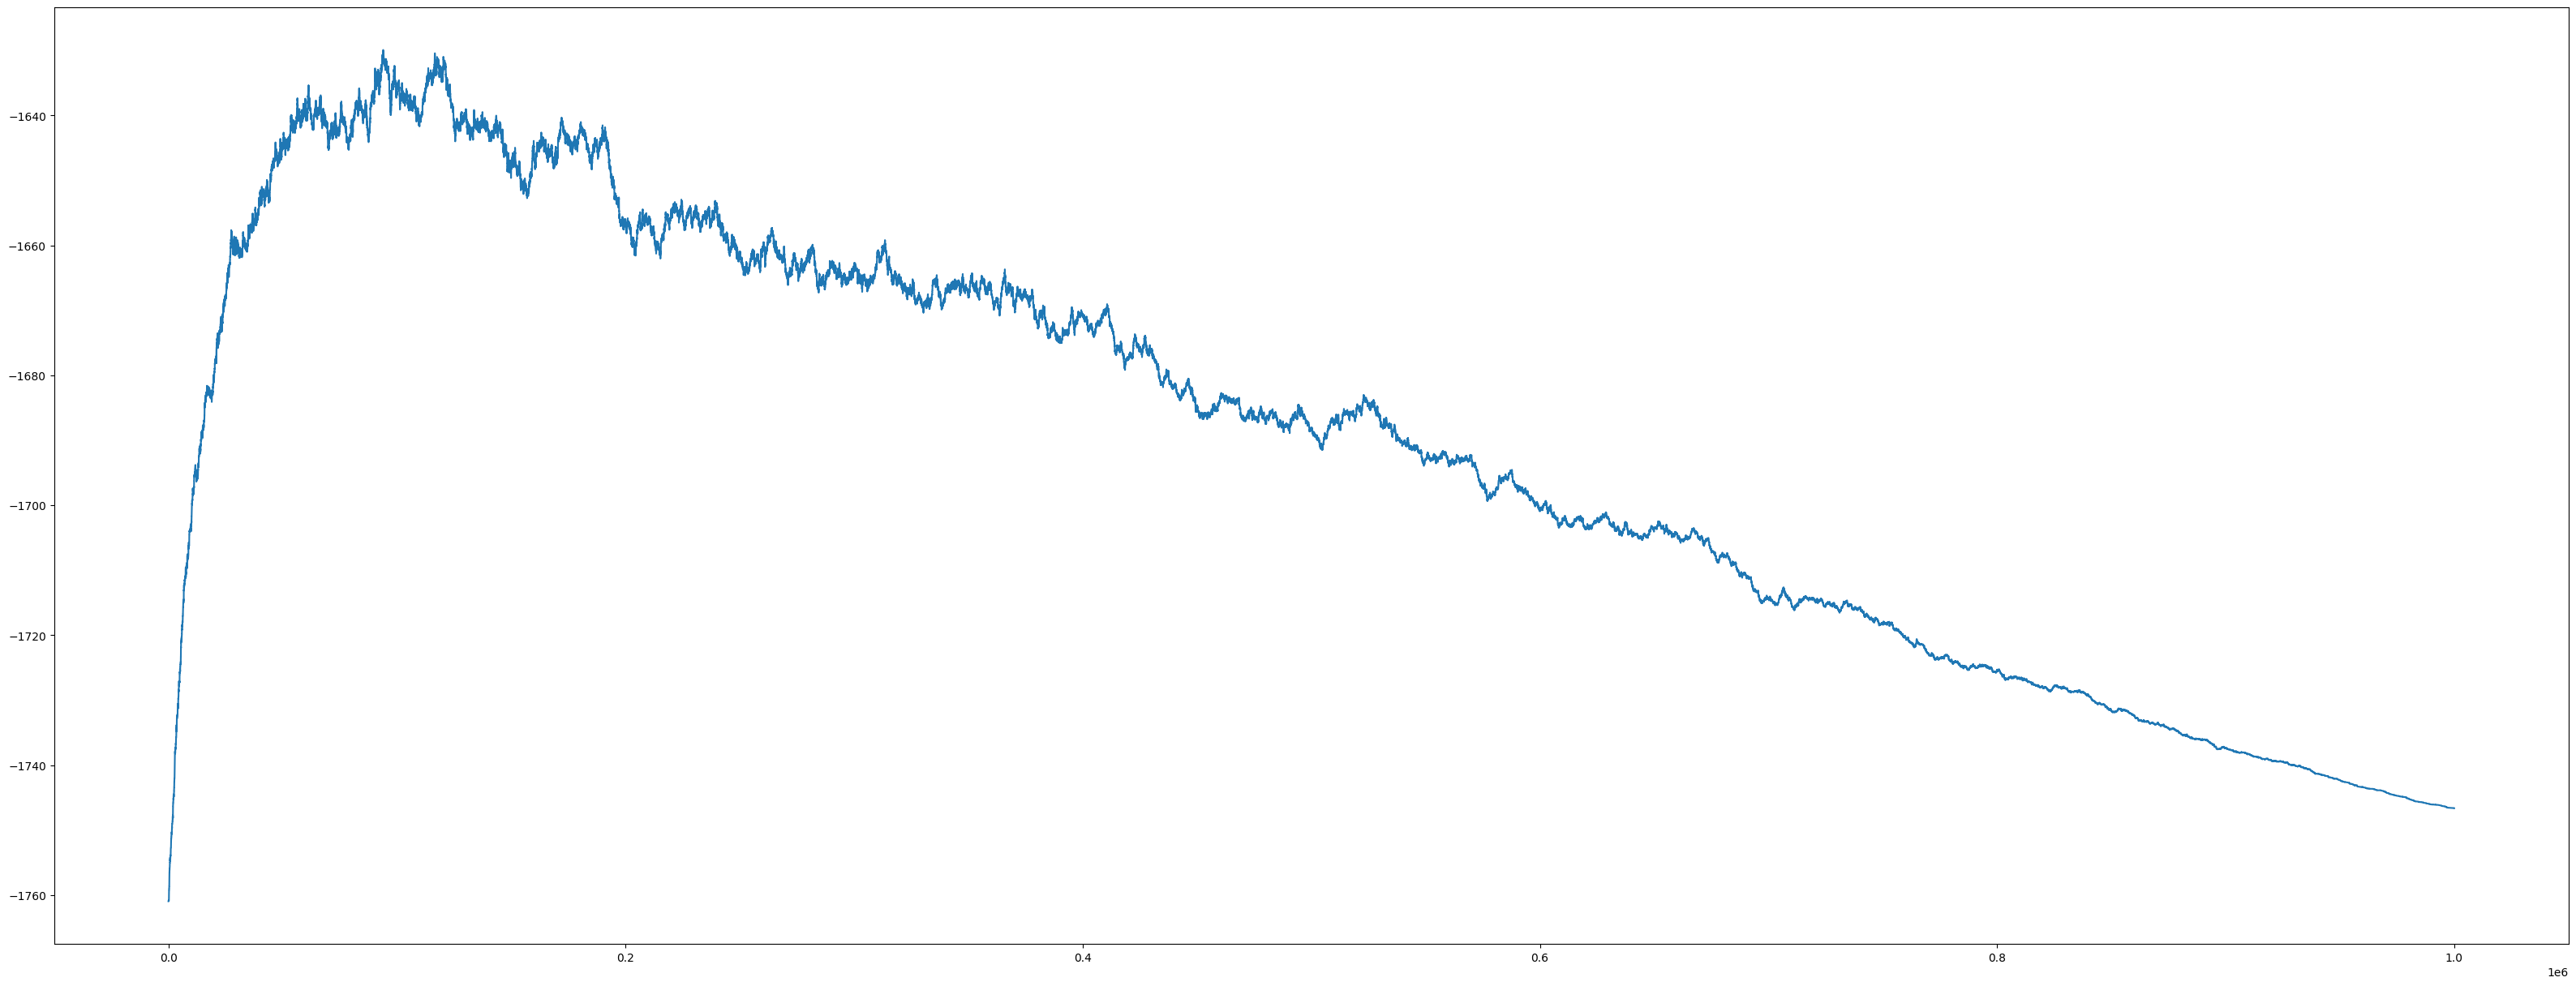

In [32]:
plt.plot(range(numberSteps+1), energyList)

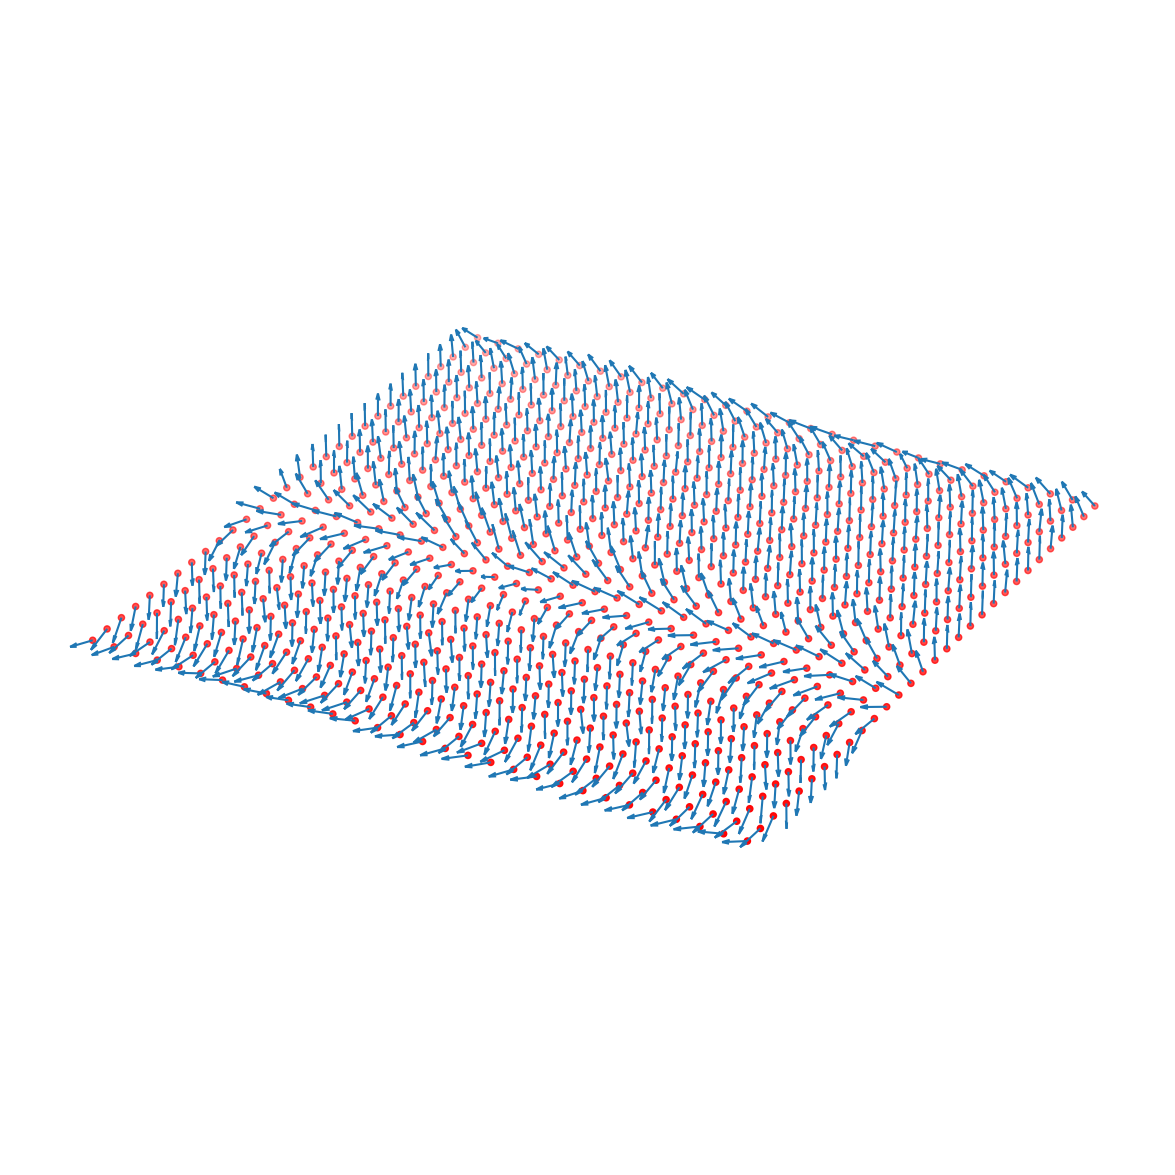

In [33]:
arrowplot = plt.axes(projection='3d')
arrowplot.set_zlim(-1,1)
arrowplot.set_box_aspect(aspect = (length, length, 2))

# make background invisible
arrowplot.axis(False)

# Quiver plot
arrowplot.quiver(
    coords[0],coords[1],coords[2],
    mag[0],mag[1],mag[2]
    )

# Coordinate plot
arrowplot.scatter3D(coords[0],coords[1],coords[2], color='red')

__Update 2:__ We include the energy corresponding to the interaction with the magnetic field:

__Update 3:__ We include the energy corresponding to the Dzyaloshinskii–Moriya interaction (asymmetric exchange):

In [34]:
def stepT(mag, kBtemp):
    # 1.
    x = np.random.randint(length)
    y = np.random.randint(length)
    energyold = 2 * energyExchangeContribution(mag,x,y) + energyMagneticContribution(mag,x,y) + 2 * energyDMIContribution(mag,x,y)
    # 2.
    randphi = 2*np.pi * np.random.rand()
    randtheta = np.pi * np.random.rand()
    # Problem with the ids: savemag = mag[:,x,y,0] ==> savemag will be changed once mag[:,x,y,0] is changed in the next line
    savemag = np.array(mag[:,x,y,0])
    mag[:,x,y,0] = np.array([ np.cos(randphi)*np.sin(randtheta), np.sin(randphi)*np.sin(randtheta), np.cos(randtheta) ])
    # 3. 
    energynew = 2 * energyExchangeContribution(mag,x,y) + energyMagneticContribution(mag,x,y) + 2 * energyDMIContribution(mag,x,y)
    # 4.
    if ( energynew < energyold):
        # accept the change & update the energy
        energychange = energynew - energyold
    else:
        if np.random.rand() < np.exp( -(energynew - energyold) / kBtemp ):
            # accept the change & update the energy
            energychange = energynew - energyold
        else:
            # decline & restore old moment
            mag[:,x,y,0] = savemag
            energychange = 0
    return [mag, energychange]

## 4. Run the Monte Carlo algorithm

In [35]:
numberSteps = 10000000

#optional
# energy = energyExchange(mag)
energy = energyExchange(mag) + energyMagnetic(mag) + energyDMI(mag)
energyList = [energy]

for i in range(numberSteps):
    # mag, energychange = stepExchange(mag)          # Initial version: zero temperature
    kBtemp = 0.2*(1-i/numberSteps)
    # mag, energychange = stepExchangeT(mag,kBtemp)  # Update 1: Consider finite temperatures
    mag, energychange = stepT(mag,kBtemp)            # Update 2&3: Add interaction with magnetic field & DMI
    #optional
    energy = energy + energychange
    energyList.append(energy)

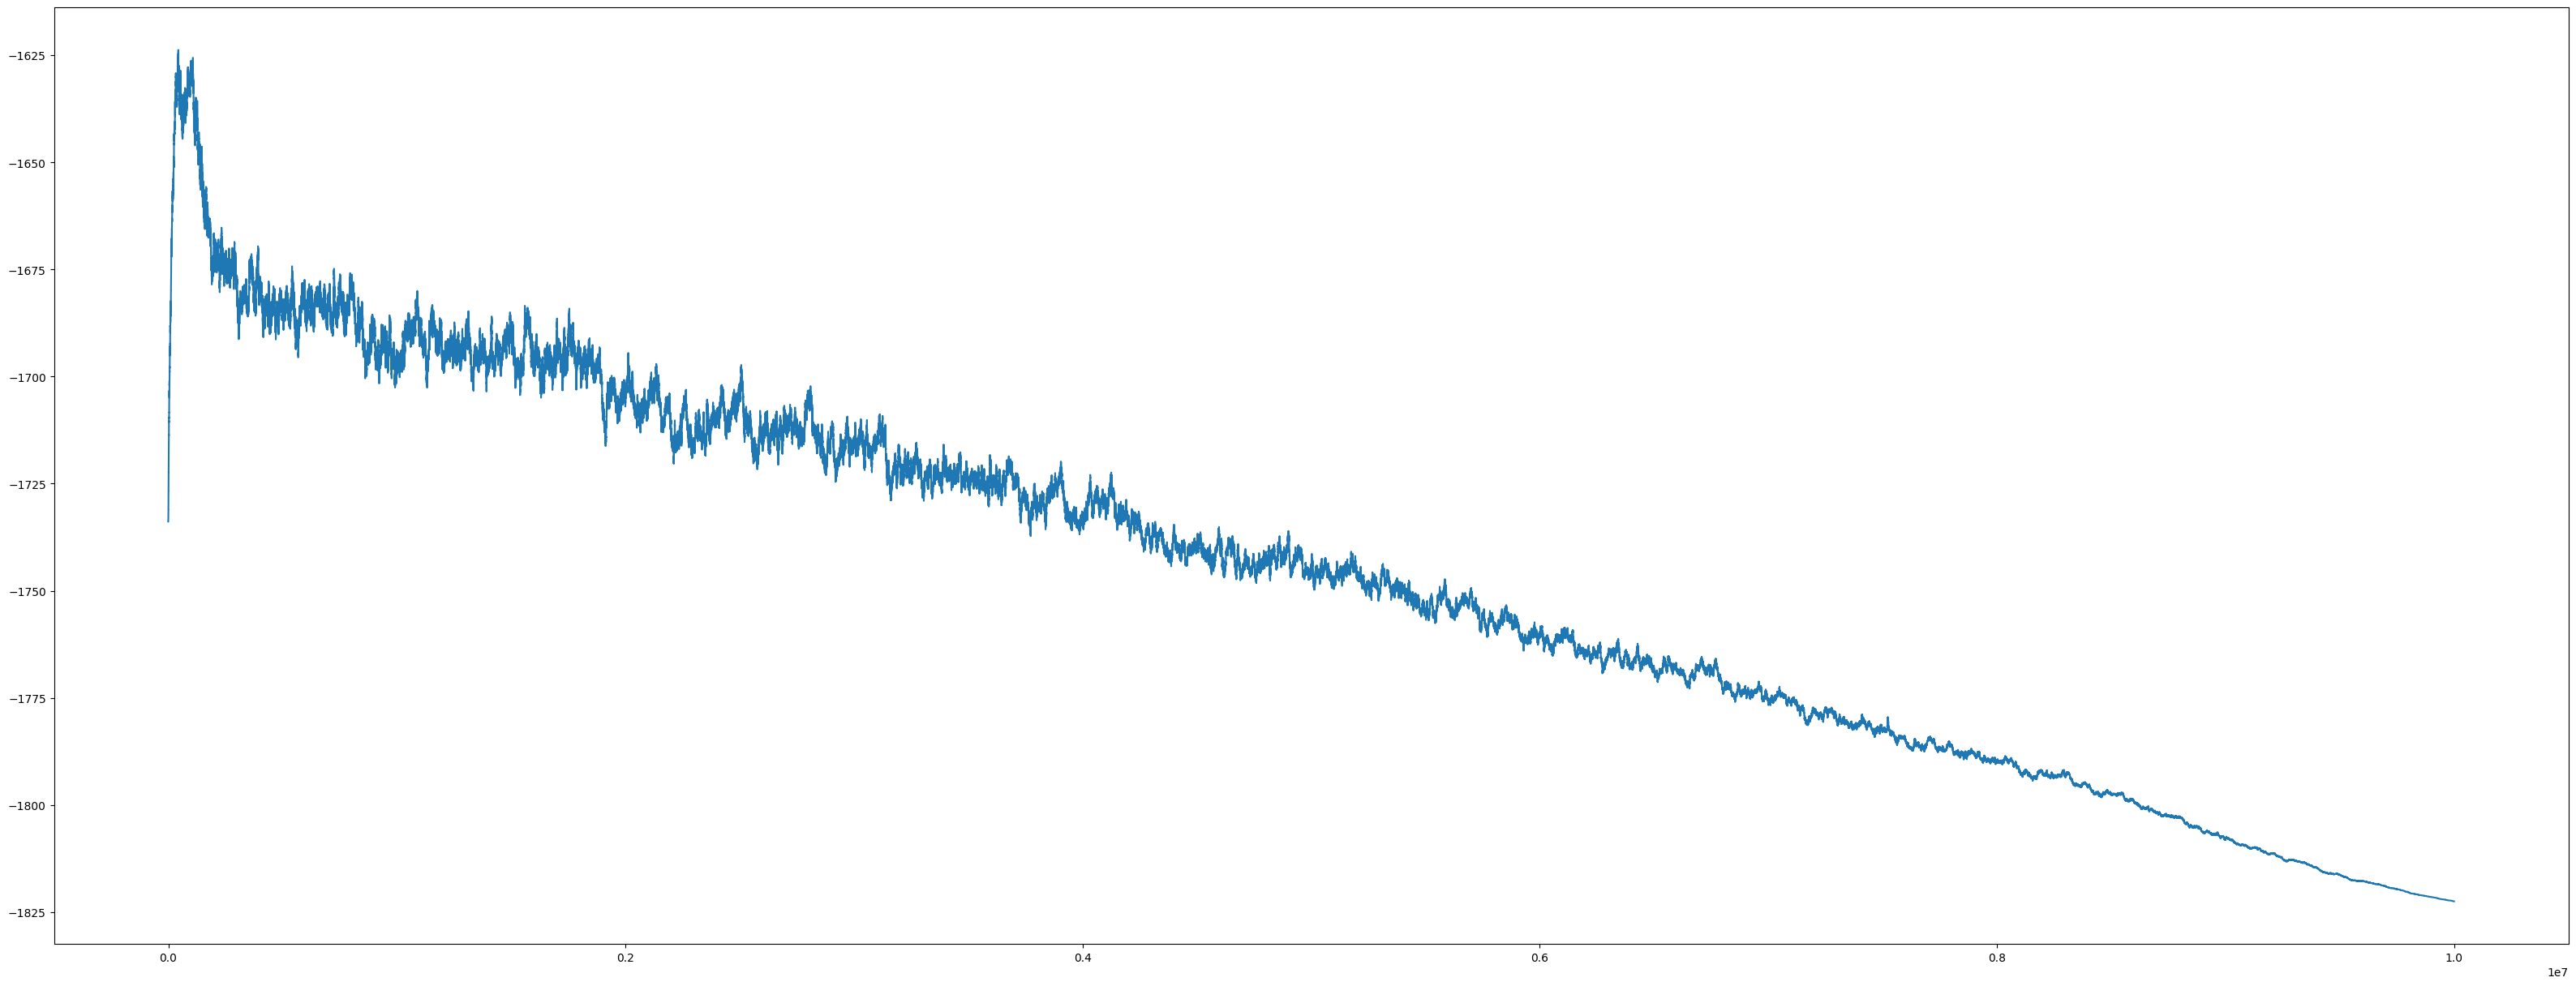

In [36]:
plt.plot(range(numberSteps+1), energyList)

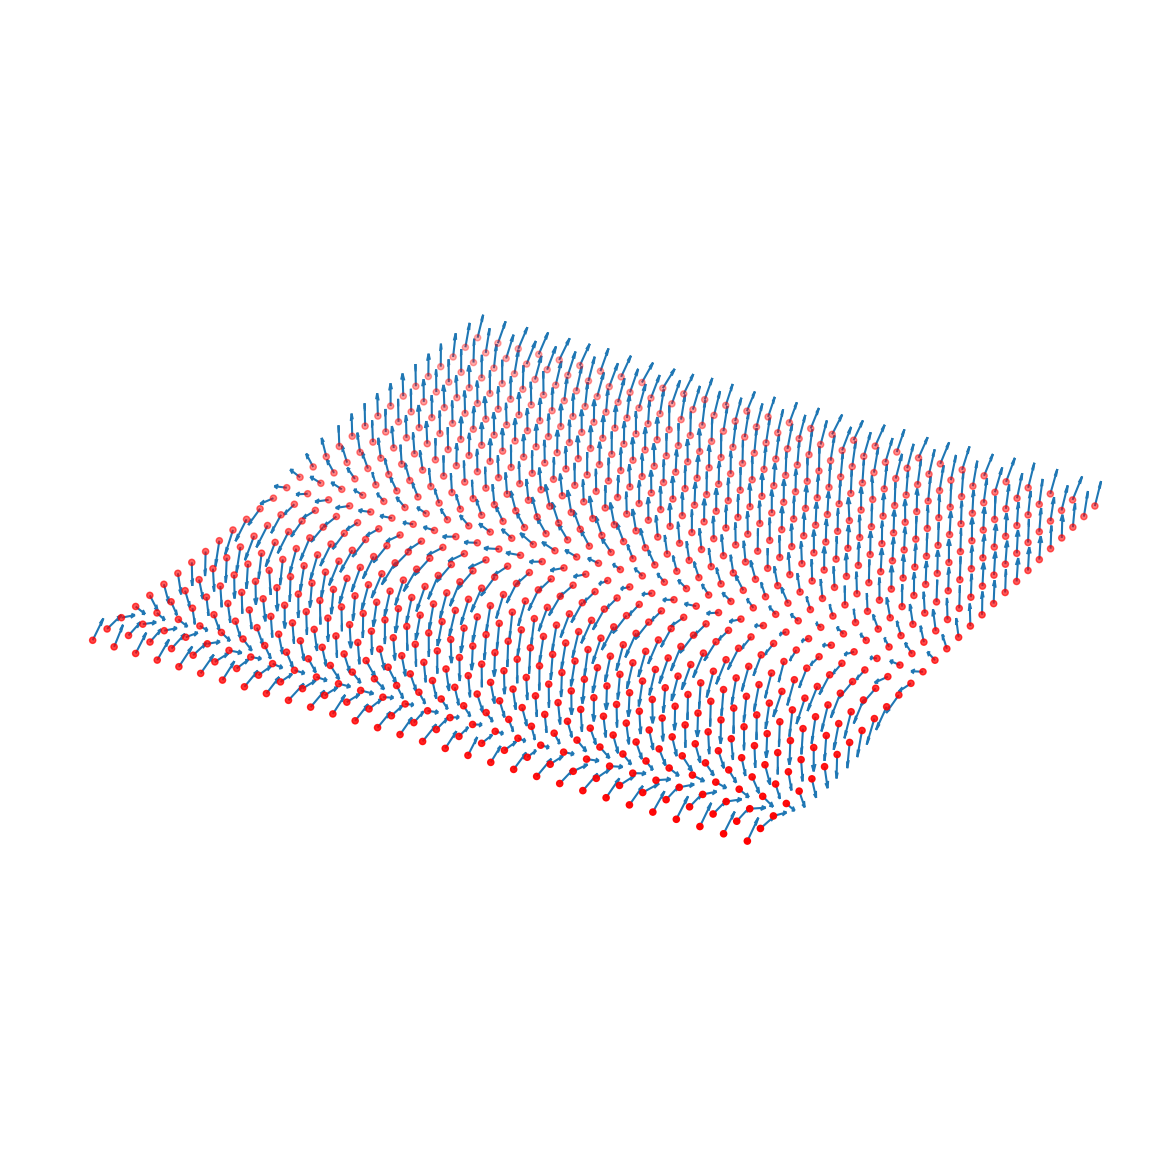

In [37]:
arrowplot = plt.axes(projection='3d')
arrowplot.set_zlim(-1,1)
arrowplot.set_box_aspect(aspect = (length, length, 2))

# make background invisible
arrowplot.axis(False)

# Quiver plot
arrowplot.quiver(
    coords[0],coords[1],coords[2],
    mag[0],mag[1],mag[2]
    )

# Coordinate plot
arrowplot.scatter3D(coords[0],coords[1],coords[2], color='red')

In [38]:
energyList[-1]

-1822.4976535637913

In [39]:
energyExchange(mag) 

-1767.0856586982572